### 그래프 만들기 

##### 산점도 - 변수 간 관계 표현하기

In [1]:
import pandas as pd

In [2]:
mpg = pd.read_csv('mpg.csv')

In [3]:
import seaborn as sns

[(3.0, 6.0), (10.0, 30.0)]

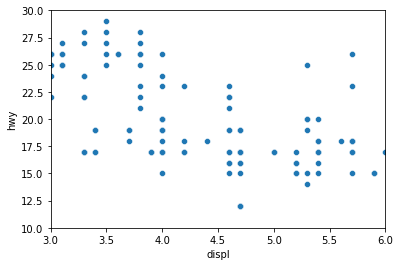

In [7]:
sns.scatterplot(data = mpg , x = 'displ', y='hwy') \
    .set(xlim = (3,6), ylim = (10,30)) 

<AxesSubplot:xlabel='displ', ylabel='hwy'>

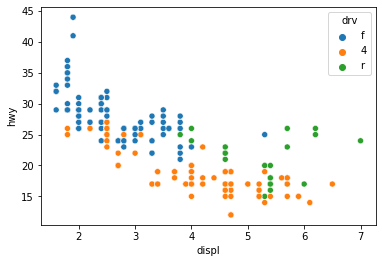

In [8]:
sns.scatterplot( data = mpg, x = 'displ', y = 'hwy' , hue = 'drv')

#### Q1.mpg 데이터의 cty와 hwy 간에 어던 관계가 있는지 알아보려고 합니다. x축은 cty, y축은 hwy로 된 산점도를 만들어 보세요.

<AxesSubplot:xlabel='cty', ylabel='hwy'>

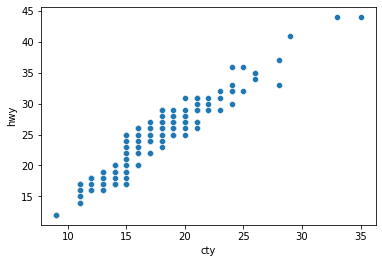

In [9]:
sns.scatterplot(data = mpg , x = 'cty', y = 'hwy')

#### Q2. 미국 지역별 인구 통계를 통해 전체 인구와 아시아인 인구 간에 어떤 관계가 있는지 알아 보려고 합니다. x축은 poptotal, y축은 popasian으로 된 산점도를 만들어 보세요.
전체 인구는 50만 명 이하, 아시아인 인구는 1만명 이하인 지역만 산점도에 표시되게 설정하세요.

In [10]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

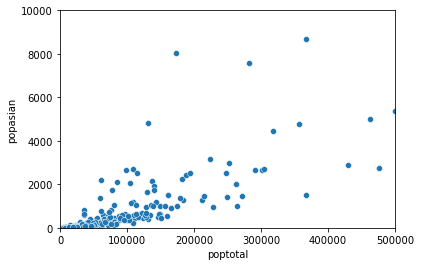

In [14]:
sns.scatterplot( data = midwest , x = 'poptotal', y = 'popasian') \
    .set(xlim = (0,500000), ylim = (0,10000))

### 막대 그래프 - 집단 간 차이 표현하기

In [17]:
df_mpg = mpg.groupby('drv',as_index = False) \
            .agg(mean_hwy = ('hwy','mean'))

In [18]:
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

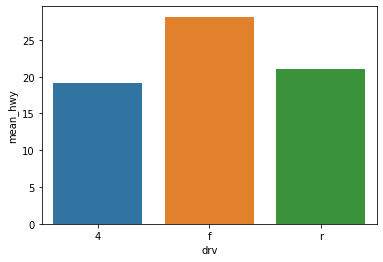

In [19]:
sns.barplot(data = df_mpg, x='drv', y = 'mean_hwy')

In [20]:
df_mpg = df_mpg.sort_values('mean_hwy',ascending = False)

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

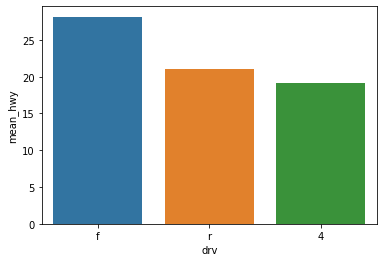

In [21]:
sns.barplot(data = df_mpg , x = 'drv', y='mean_hwy')

In [22]:
df_mpg = mpg.groupby('drv',as_index = False ) \
            .agg(n = ('drv','count'))

In [23]:
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='n'>

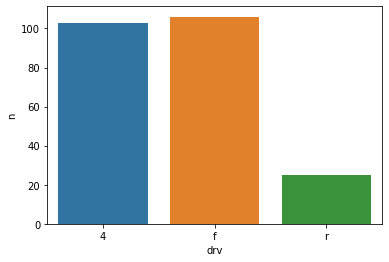

In [24]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<AxesSubplot:xlabel='drv', ylabel='count'>

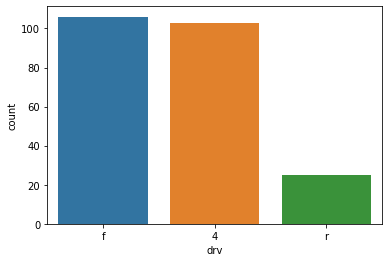

In [25]:
sns.countplot(data = mpg , x = 'drv')

#### Q1. 어떤 회사에서 생산한 'suv' 차종의 도시 연비가 높은지 알아보려고 합니다. 'suv' 차종을 대상으로 cty 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요. 
막대는 연비가 높은 순으로 정렬하세요.

In [26]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [44]:
suv = mpg.query('category == "suv"') \
        .groupby('manufacturer',as_index = False) \
        .agg(mean_cty = ('cty','mean')) \
        .sort_values('mean_cty' , ascending = False) \
        .head()

<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

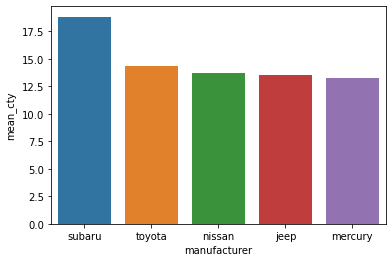

In [45]:
sns.barplot( data = suv , x = 'manufacturer', y = 'mean_cty')

#### Q2. 자동차 중에 어떤 category가 많은지 알아보려고 합니다. sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어보세요. 막대는 빈도가 높은 순으로 정렬하세요.

In [57]:
k_mpg = mpg.groupby('category',as_index = False) \
    .agg( n = ('category','count')) \
    .sort_values('n',ascending = False)

<AxesSubplot:xlabel='category', ylabel='n'>

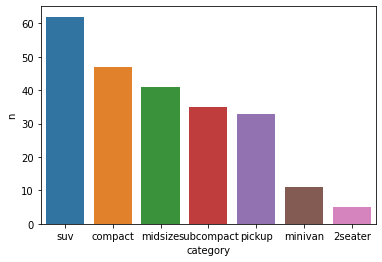

In [58]:
sns.barplot(data = k_mpg , x = 'category', y = 'n')

### 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

In [60]:
economics = pd.read_csv('economics.csv')

In [61]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<AxesSubplot:xlabel='date', ylabel='unemploy'>

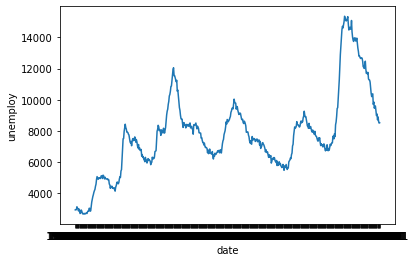

In [62]:
sns.lineplot(data = economics , x = 'date', y = 'unemploy')

In [66]:
economics['date2'] = pd.to_datetime(economics['date'])

In [67]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [68]:
economics[['date','date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [69]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [70]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [71]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [72]:
economics['year'] = economics['date2'].dt.year

In [73]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='unemploy'>

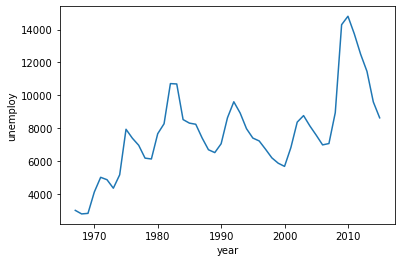

In [75]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None )

#### Q1. psavert(개인 저축률)가 시간에 따라 어떻게 변해 왔는지 알아보려고 합니다. 연도별 개인 저축률의 변화를 나타난 시계열 그래프를 만들어 보세요.

<AxesSubplot:xlabel='year', ylabel='psavert'>

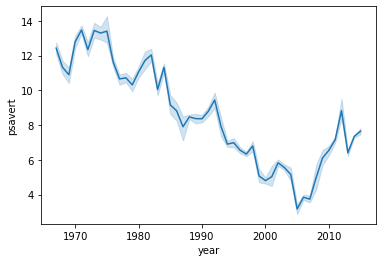

In [76]:
sns.lineplot(data = economics , x = 'year', y = 'psavert')

#### Q2. 2014년 월별 psavert의 변화를 나타낸 시계열 그래프를 만들어 보세요.

In [77]:
economics['month'] = economics['date2'].dt.month

<AxesSubplot:xlabel='month', ylabel='psavert'>

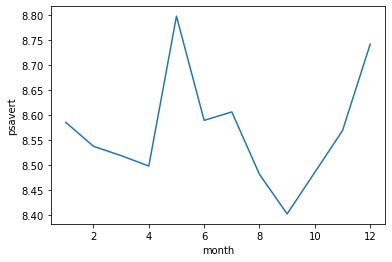

In [80]:
sns.lineplot(data = economics , x = 'month', y = 'psavert' , ci = None)

### 상자 그림 - 집단 간 분포 차이 표현하기 

<AxesSubplot:xlabel='drv', ylabel='hwy'>

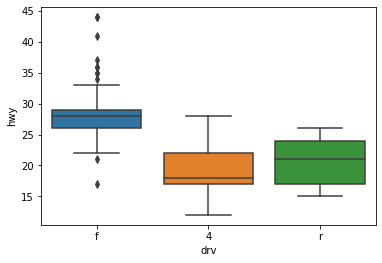

In [81]:
sns.boxplot ( data = mpg , x = 'drv', y = 'hwy')

#### Q1. cateogry가 'compact','subcompact','suv' 인 자동차의 cty가 어떻게 다른지 비교해 보려고 합니다. 세 차종의 cty를 나타낸 상자 그림을 만들어 보세요.

In [85]:
mpg = mpg.query('category in ["compact", "subcompact","suv"]')

<AxesSubplot:xlabel='category', ylabel='cty'>

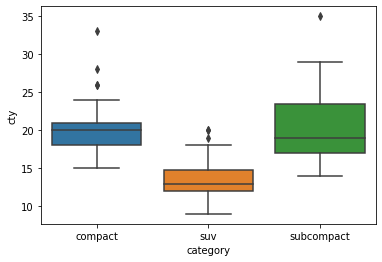

In [86]:
sns.boxplot( data = mpg, x = 'category' , y = 'cty')